In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import zipfile

zip_file=zipfile.ZipFile("open.zip")
zip_file.extractall()

In [3]:
train = pd.read_csv('train.csv', index_col='ID')
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [4]:
test = pd.read_csv('test.csv', index_col='ID')
test.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2


In [5]:
train.shape, test.shape

((30200, 13), (12943, 12))

In [6]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30200 entries, TRAIN_00000 to TRAIN_30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.2+ MB


In [8]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


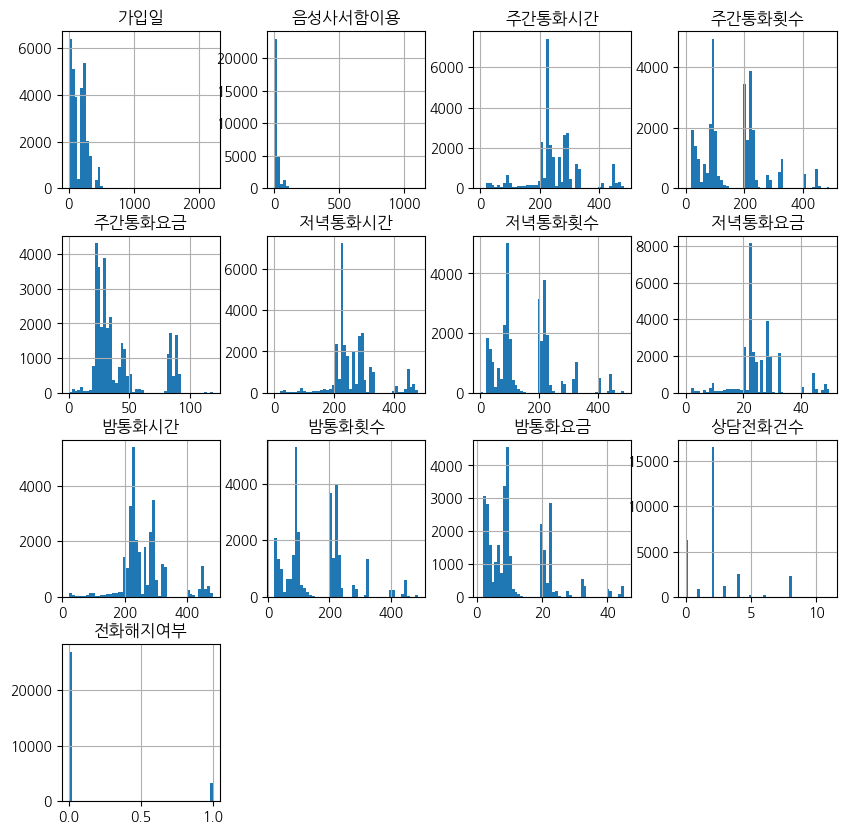

In [9]:
import koreanize_matplotlib
train.hist(bins=50, figsize=(10,10));

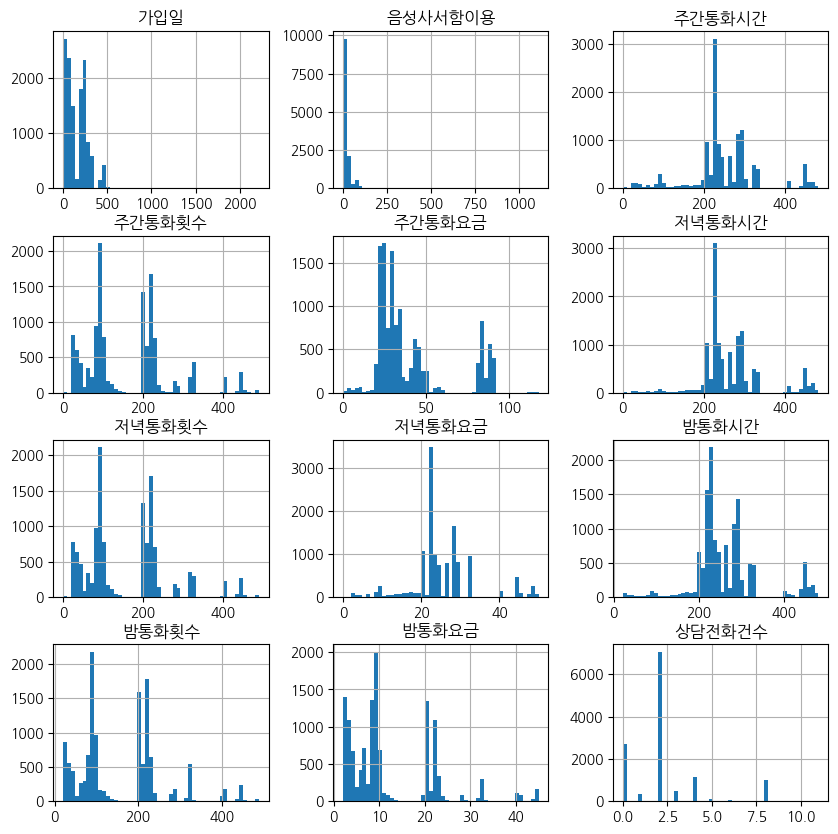

In [10]:
test.hist(bins=50, figsize=(10,10));

<Axes: xlabel='전화해지여부', ylabel='count'>

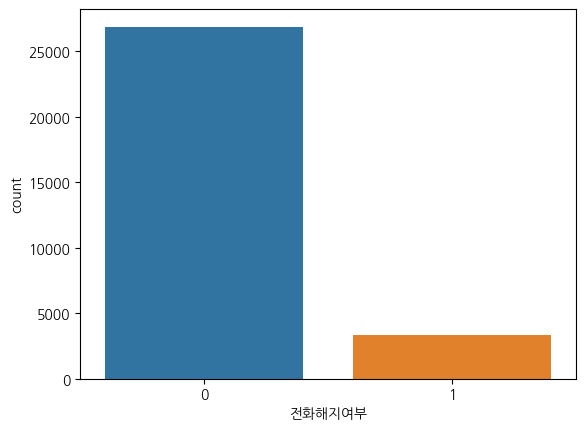

In [11]:
sns.countplot(data=train, x='전화해지여부')

In [12]:
train[train['전화해지여부'] == 1].describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.0
mean,162.088608,7.587101,257.764708,162.348403,36.406841,263.212899,157.230561,25.433927,262.835142,156.143761,12.463539,2.621459,1.0
std,120.112890,18.348552,80.513591,100.104352,19.427776,68.344831,100.908386,7.490529,67.395499,101.216735,9.256371,2.269361,0.0
min,1.000000,0.000000,0.100000,0.000000,0.100000,21.100000,20.000000,2.290000,22.600000,20.000000,2.020000,0.000000,1.0
25%,67.000000,0.000000,224.200000,88.000000,24.000000,223.900000,87.000000,22.220000,223.700000,83.000000,6.320000,2.000000,1.0
50%,135.000000,1.000000,250.250000,143.000000,29.800000,244.100000,111.000000,23.320000,244.300000,110.000000,9.230000,2.000000,1.0
75%,229.000000,1.000000,290.800000,223.000000,40.575000,289.900000,223.000000,28.880000,290.100000,223.000000,20.330000,3.000000,1.0
max,2012.000000,117.000000,481.900000,489.000000,117.800000,481.400000,489.000000,49.890000,481.000000,488.000000,44.890000,11.000000,1.0


In [13]:
train[train['전화해지여부'] == 0].describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.0
mean,159.441857,12.587159,249.674619,158.784131,41.669660,263.251451,158.628078,25.389364,263.512730,157.158954,12.026648,2.246931,0.0
std,124.193729,25.566918,84.830161,101.747847,23.536478,74.741785,102.359429,8.223539,74.529181,101.785060,9.432624,2.018357,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.0
25%,63.000000,0.000000,222.500000,88.000000,24.500000,223.700000,87.000000,22.220000,223.700000,87.000000,4.480000,2.000000,0.0
50%,116.000000,1.000000,233.600000,115.000000,31.200000,242.950000,112.000000,23.300000,242.700000,107.000000,9.020000,2.000000,0.0
75%,228.000000,23.000000,289.400000,223.000000,46.200000,290.400000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.0
max,2212.000000,1112.000000,481.200000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,0.0


In [14]:
train.columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

In [15]:
train['총통화시간'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
test['총통화시간'] = test['주간통화시간'] + test['저녁통화시간'] + test['밤통화시간']

train['총통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']
test['총통화횟수'] = test['주간통화횟수'] + test['저녁통화횟수'] + test['밤통화횟수']

train['총통화요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']
test['총통화요금'] = test['주간통화요금'] + test['저녁통화요금'] + test['밤통화요금']

train['평균통화시간'] = train['총통화시간'] / (train['총통화횟수'] + train['상담전화건수'])
test['평균통화시간'] = test['총통화시간'] / (test['총통화횟수'] + test['상담전화건수'])

train['회당밤통화요금'] = train['밤통화요금'] / train['밤통화횟수']
test['회당밤통화요금'] = test['밤통화요금'] / test['밤통화횟수']

train['회당밤통화시간'] = train['밤통화시간'] / train['밤통화횟수']
test['회당밤통화시간'] = test['밤통화시간'] / test['밤통화횟수']

train['시간당밤통화요금'] = train['밤통화요금'] / train['밤통화시간']
test['시간당밤통화요금'] = test['밤통화요금'] / test['밤통화시간']

## 이상치

- 음성사서함이용

<Axes: ylabel='음성사서함이용'>

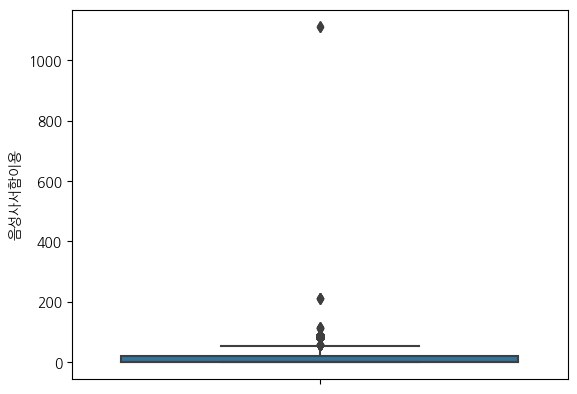

In [16]:
sns.boxplot(data=train, y='음성사서함이용')

In [17]:
train['음성사서함이용'].describe()

count    30200.000000
mean        12.037815
std         24.925334
min          0.000000
25%          0.000000
50%          1.000000
75%         22.000000
max       1112.000000
Name: 음성사서함이용, dtype: float64

In [18]:
train = train[train['음성사서함이용'] < 200]
train.shape

(30191, 20)

In [19]:
train['음성사서함이용'].describe()

count    30191.000000
mean        11.888907
std         22.213296
min          0.000000
25%          0.000000
50%          1.000000
75%         22.000000
max        117.000000
Name: 음성사서함이용, dtype: float64

- 가입일

In [20]:
train['가입일'].describe()

count    30191.000000
mean       159.599848
std        123.050071
min          1.000000
25%         63.000000
50%        118.000000
75%        228.000000
max       2212.000000
Name: 가입일, dtype: float64

In [21]:
train[train['가입일'] > 1000].shape

(24, 20)

<Axes: ylabel='가입일'>

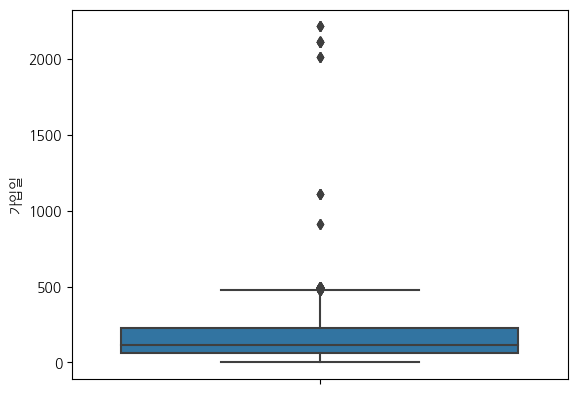

In [22]:
sns.boxplot(data=train, y='가입일')

In [23]:
train = train[train['가입일'] < 1000]
train.shape

(30167, 20)

In [24]:
train['가입일'].describe()

count    30167.000000
mean       158.242716
std        112.617294
min          1.000000
25%         63.000000
50%        117.000000
75%        228.000000
max        912.000000
Name: 가입일, dtype: float64

## 상관계수 보기

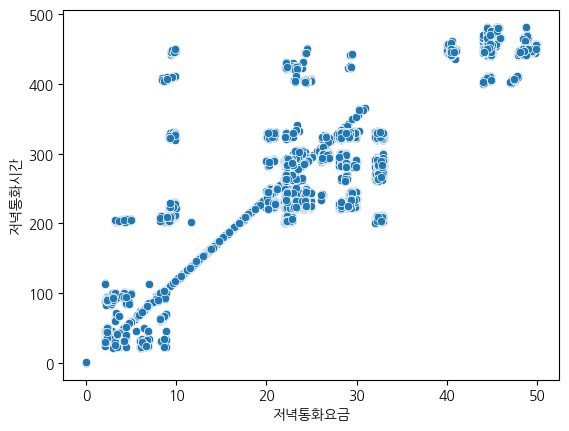

In [25]:
sns.scatterplot(data=train, x='저녁통화요금', y='저녁통화시간');

In [26]:
train[['저녁통화요금', '저녁통화시간']].corr()

,저녁통화요금,저녁통화시간
저녁통화요금,1.000000,0.806895
저녁통화시간,0.806895,1.000000


## 데이터 구간화

In [27]:
# 데이터 구간화
cut_size=5
train['가입일_bin'] = pd.qcut(train['가입일'].rank(method='first'), cut_size, labels=list(range(1,6)))
test['가입일_bin'] = pd.qcut(test['가입일'].rank(method='first'), cut_size, labels=list(range(1,6)))

train['가입일_bin'].value_counts()

1    6034
5    6034
2    6033
3    6033
4    6033
Name: 가입일_bin, dtype: int64

In [28]:
train['가입일_bin'] = train['가입일_bin'].astype('int')
test['가입일_bin'] = test['가입일_bin'].astype('int')

## 데이터 분할

In [29]:
feature_names = train.columns.to_list()
feature_names.remove('전화해지여부')
# feature_names.remove('상담전화건수')
feature_names

['가입일',
 '음성사서함이용',
 '주간통화시간',
 '주간통화횟수',
 '주간통화요금',
 '저녁통화시간',
 '저녁통화횟수',
 '저녁통화요금',
 '밤통화시간',
 '밤통화횟수',
 '밤통화요금',
 '상담전화건수',
 '총통화시간',
 '총통화횟수',
 '총통화요금',
 '평균통화시간',
 '회당밤통화요금',
 '회당밤통화시간',
 '시간당밤통화요금',
 '가입일_bin']

In [30]:
label_name = '전화해지여부'

X = train[feature_names]
y = train[label_name]

X.shape, y.shape

((30167, 20), (30167,))

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, 
                                                    random_state=42, stratify=y)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((27150, 20), (3017, 20), (27150,), (3017,))

In [32]:
test = test[feature_names]
test.shape

(12943, 20)

## 로그변환

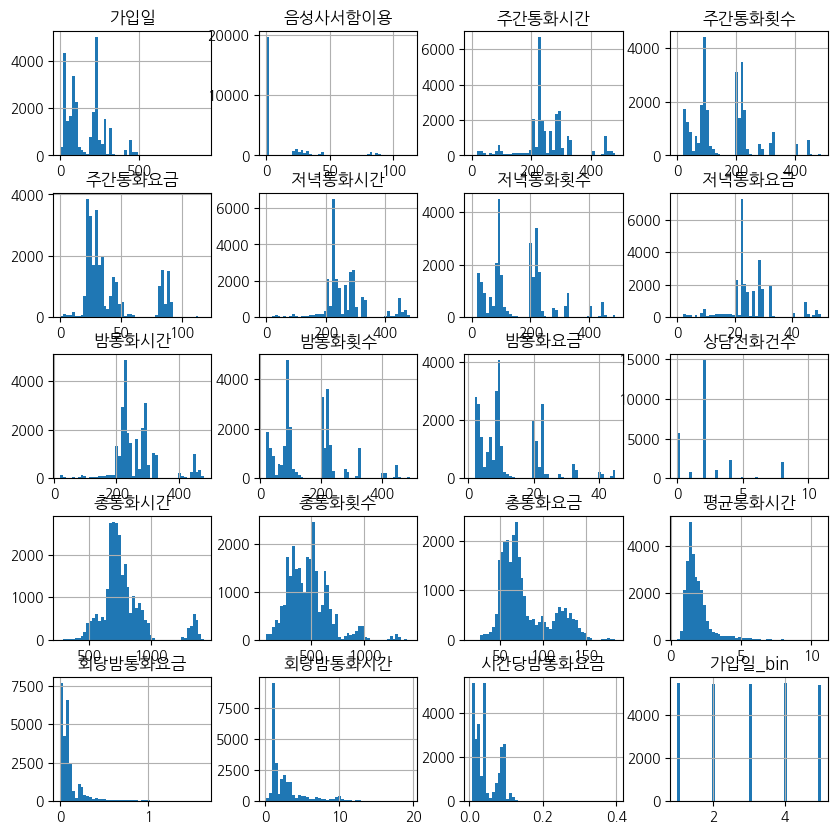

In [33]:
X_train.hist(bins=50, figsize=(10,10));

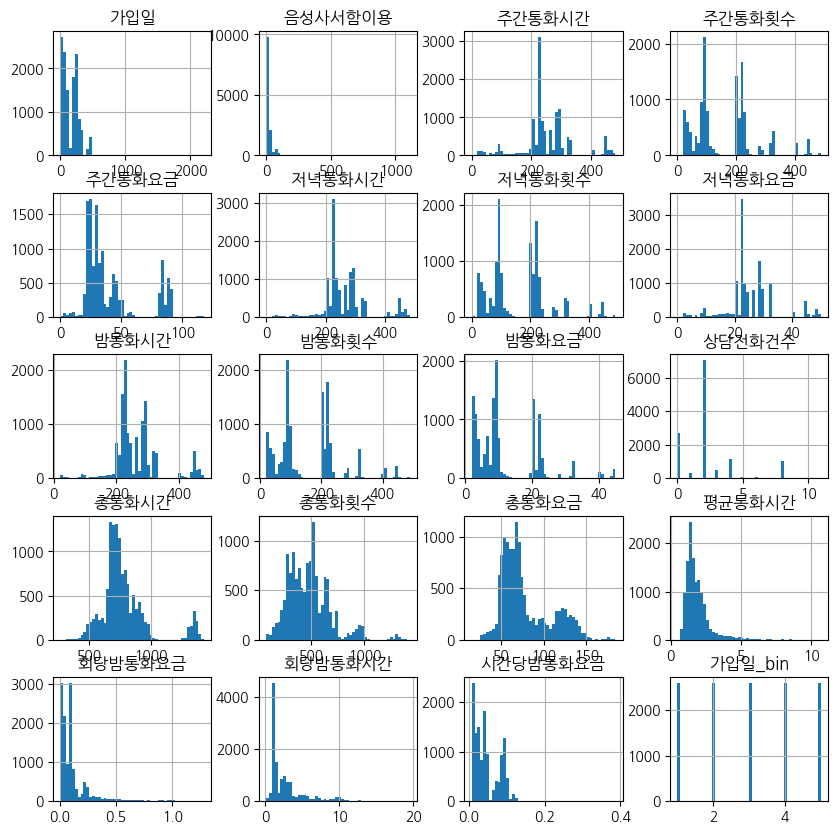

In [34]:
test.hist(bins=50, figsize=(10,10));

In [35]:
columns = ['가입일', '음성사서함이용', '상담전화건수', '평균통화시간', 
           '회당밤통화요금', '회당밤통화시간', '시간당밤통화요금']

for col in columns:
    X_train[col] = np.log1p(X_train[col])
    X_valid[col] = np.log1p(X_valid[col])
    test[col] = np.log1p(test[col])

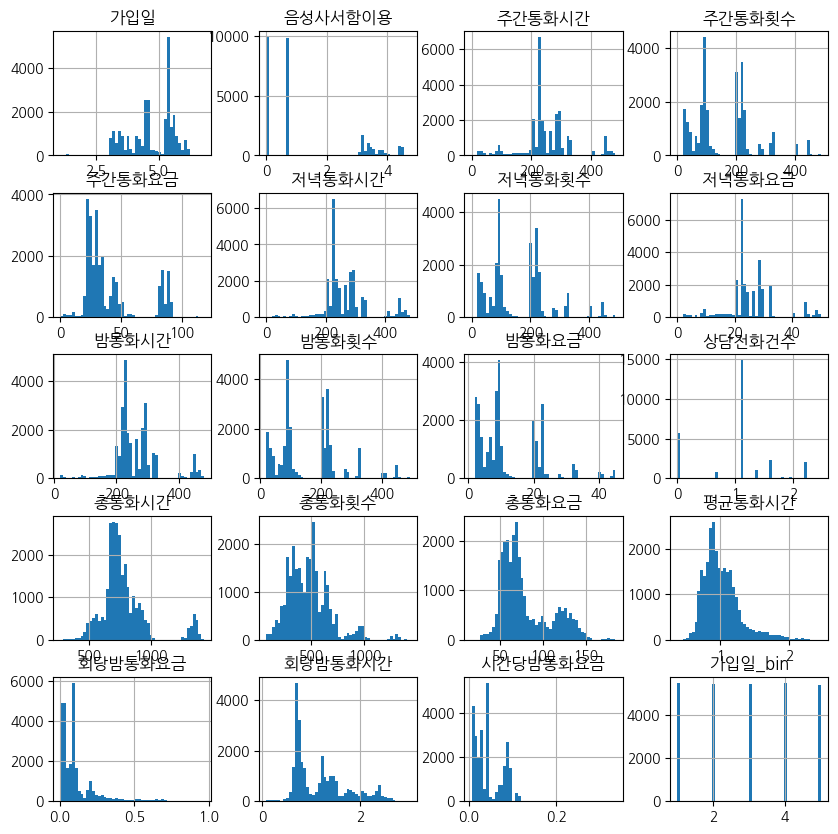

In [36]:
X_train.hist(bins=50, figsize=(10,10));

## 스케일링

In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(test)

In [38]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)
# X_test_scaled = scaler.transform(test)

## PCA

In [39]:
# from sklearn.decomposition import PCA

# # 주성분 개수 설정
# n_components = 3

# pca = PCA(n_components=n_components)
# pca.fit(X_train_scaled)

In [40]:
# X_train_pca = pca.transform(X_train_scaled)
# X_valid_pca = pca.transform(X_valid_scaled)
# X_test_pca = pca.transform(X_test_scaled)

## 모델링

In [41]:
# import lightgbm as lgbm

# model = lgbm.LGBMClassifier(boosting_type='gbdt', 
#                             early_stop_round=100, # 예측 오류가 100번 동안 더 이상 개선되지 않으면 반복을 중지
#                             metrics=['f1'], # mae나 mse가 성능이 좋아지지 않으면 멈춰라
#                             n_jobs=-1, random_state=42)
# model

In [42]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [43]:
n_estimators = np.random.randint(100, 190, 10)
n_estimators

array([121, 166, 128, 174, 100, 138, 176, 135, 103, 129])

In [44]:
learning_rate = np.random.uniform(0.2, 0.3, 10)
learning_rate

array([0.26312868, 0.20133578, 0.26519971, 0.26503867, 0.28792994,
       0.21034209, 0.27822975, 0.23558979, 0.23408069, 0.27095139])

In [45]:
max_depth = np.random.randint(3, 20, 5)
max_depth

array([19, 10,  5, 18, 14])

In [46]:
params = {'n_estimators': n_estimators,
          'learning_rate': learning_rate,
          'max_depth': max_depth}
params

{'n_estimators': array([121, 166, 128, 174, 100, 138, 176, 135, 103, 129]),
 'learning_rate': array([0.26312868, 0.20133578, 0.26519971, 0.26503867, 0.28792994,
        0.21034209, 0.27822975, 0.23558979, 0.23408069, 0.27095139]),
 'max_depth': array([19, 10,  5, 18, 14])}

In [47]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model, params, n_iter=10, scoring = 'f1_macro', n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.26312868, 0.20133578, 0.26519971, 0.26503867, 0.28792994,
       0.21034209, 0.27822975, 0.23558979, 0.23408069, 0.27095139]),
                                        'max_depth': array([19, 10,  5, 18, 14]),
                                        'n_estimators': array([121, 166, 128, 174, 100, 138, 176, 135, 103, 129])},
                   scoring='f1_macro', verbose=1)

In [48]:
best_model = clf.best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.21034208541508048,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=103, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [49]:
clf.best_score_

0.7558831999205848

In [50]:
best_params = clf.best_params_
list(zip(best_params.keys(), best_params.values()))

[('n_estimators', 103),
 ('max_depth', 18),
 ('learning_rate', 0.21034208541508048)]

In [51]:
# from xgboost.callback import EarlyStopping

# es = xgb.callback.EarlyStopping(
#     rounds=3, # 5번이상 성능이 좋아지지 않으면 학습을 멈춰라
#     save_best=True,
#     maximize=False,
# )
# best_model.fit(X_train_scaled, y_train, eval_set=[(X_valid_scaled, y_valid)], callbacks=[es])

## 평가

In [52]:
y_valid_pred = best_model.predict(X_valid_scaled)
y_valid_pred[:5]

array([0, 0, 0, 1, 0])

In [53]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_valid_pred, average='macro')

0.7690794486213152

In [54]:
# valid score
model_score = best_model.score(X_valid_scaled, y_valid)
model_score

0.9201193238316208

In [55]:
# fi = pd.Series(best_model.feature_importances_)
# fi.index = best_model.feature_name_
# fi.nlargest(20).sort_values().plot.barh()

In [56]:
# test에 predict
y_pred = best_model.predict(X_test_scaled)
y_pred[:5]

array([0, 0, 0, 0, 1])

## 제출

In [57]:
submission = pd.read_csv('sample_submission.csv')
submission.shape

(12943, 2)

In [58]:
submission.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [59]:
submission['전화해지여부'] = y_pred

In [60]:
submission.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1


In [61]:
submission['전화해지여부'].value_counts(1)

0    0.923974
1    0.076026
Name: 전화해지여부, dtype: float64

In [62]:
file_name = list(zip(best_params.keys(), best_params.values()))
file_name

[('n_estimators', 103),
 ('max_depth', 18),
 ('learning_rate', 0.21034208541508048)]

In [63]:
submission.to_csv(f'{file_name}.csv', index=False)
pd.read_csv(f'{file_name}.csv')

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


In [64]:
# xgboost
# ('n_estimators', 219), ('max_depth', 25), ('learning_rate', 0.1275158187369787)
# : 0.76

# xgboost
# ('subsample', 0.9102349303341574), ('n_estimators', 149), ('max_depth', 19), ('learning_rate', 0.13317613891984054)
# : 0.783

# xgboost_변수 추가
# n_estimators=180, max_depth=19, learning_rate=0.15
# : 0.787

# xgboost_변수 추가 + 구간화
# n_estimators=188, max_depth=19, learning_rate=0.19978054417760063
# : 0.788

# xgboost_변수 추가 + 구간화 + 파생변수 추가
# ('n_estimators', 172), ('max_depth', 19), ('learning_rate', 0.18365656439767392)
# 0.791250057